In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [8]:
df = pd.read_csv('amazon.csv',encoding="ISO-8859-1",parse_dates=['date'])

In [9]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [10]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [13]:
print("No. of rows:",df.shape[0])
print("No. of columns:",df.shape[1])

No. of rows: 6454
No. of columns: 5


In [20]:
print("Are there any duplicated values in the dataset?",df.duplicated().any())

Are there any duplicated values in the dataset? True


In [22]:
print(len(df[df.duplicated()]),"duplicated records in the dataset")

32 duplicated records in the dataset


In [23]:
len(df)

6454

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
len(df)

6422

In [27]:
df.isnull().sum(axis=0)

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [29]:
df.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [31]:
df['month_english'] = df['month'].map({'janeiro':'January',
'fevereiro':'February',
'março':'March',
'abril':'April',
'maio':'May',
'junho':'June',
'julho':'July',
'agosto':'August',
'setembro':'September',
'outubro':'October',
'novembro':'November',
'dezembro':'December'}
)

In [37]:
df.head(3)

,year,state,month,number,date,month_english
0,1998,Acre,Janeiro,0.0,1998-01-01,NaN
1,1999,Acre,Janeiro,0.0,1999-01-01,NaN
2,2000,Acre,Janeiro,0.0,2000-01-01,NaN


In [39]:
df.drop('month_english', axis =1 , inplace=True)

In [40]:
df.head(3)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01


In [41]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [47]:
df['month'].value_counts()

Agosto       540
Setembro     540
Outubro      540
Novembro     540
Junho        539
Julho        539
Janeiro      535
Fevereiro    535
Março        534
Abril        534
Maio         533
Dezembro     513
Name: month, dtype: int64

In [51]:
df['month_english']=df['month'].map({'Janeiro':'January',
'Fevereiro':'February',
'Março':'March',
'Abril':'April',
'Maio':'May',
'Junho':'June',
'Julho':'July',
'Agosto':'August',
'Setembro':'September',
'Outubro':'October',
'Novembro':'November',
'Dezembro':'December'})

In [52]:
df.head()

,year,state,month,number,date,month_english
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [55]:
print("Total number of fires registered:",len(df))

Total number of fires registered: 6422


In [61]:
df.sort_values('number',ascending=False)[['month','number']].head(1)

,month,number
888,Setembro,998.0


In [66]:
top_month=df.groupby('month_english').sum()['number'].sort_values(ascending=False).reset_index()

<AxesSubplot:xlabel='number', ylabel='month_english'>

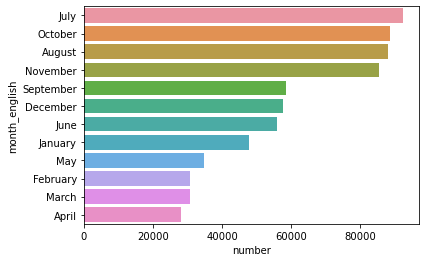

In [69]:
sns.barplot(y='month_english',x='number',data=top_month)

In [74]:
top_year=df.groupby('year').sum()['number'].sort_values(ascending=False).reset_index()
top_year

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39116.178
6,2004,38450.163
7,2002,37390.600
8,2010,37037.449
9,2017,36619.624


<AxesSubplot:xlabel='year', ylabel='number'>

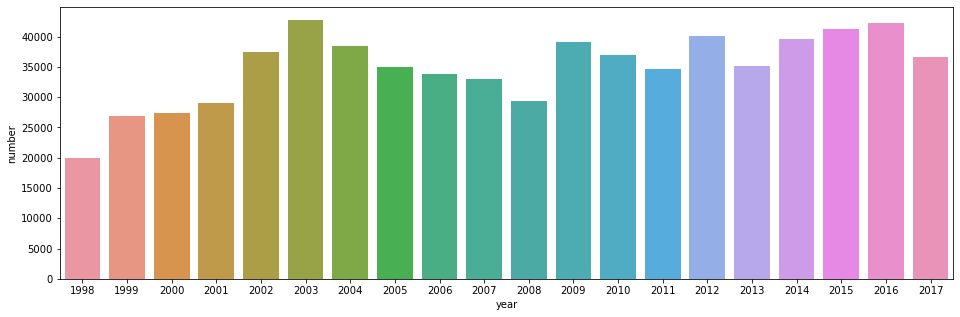

In [73]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=top_year)

In [75]:
top_state=df.groupby('state').sum()['number'].sort_values(ascending=False).reset_index()
top_state

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


<AxesSubplot:xlabel='number', ylabel='state'>

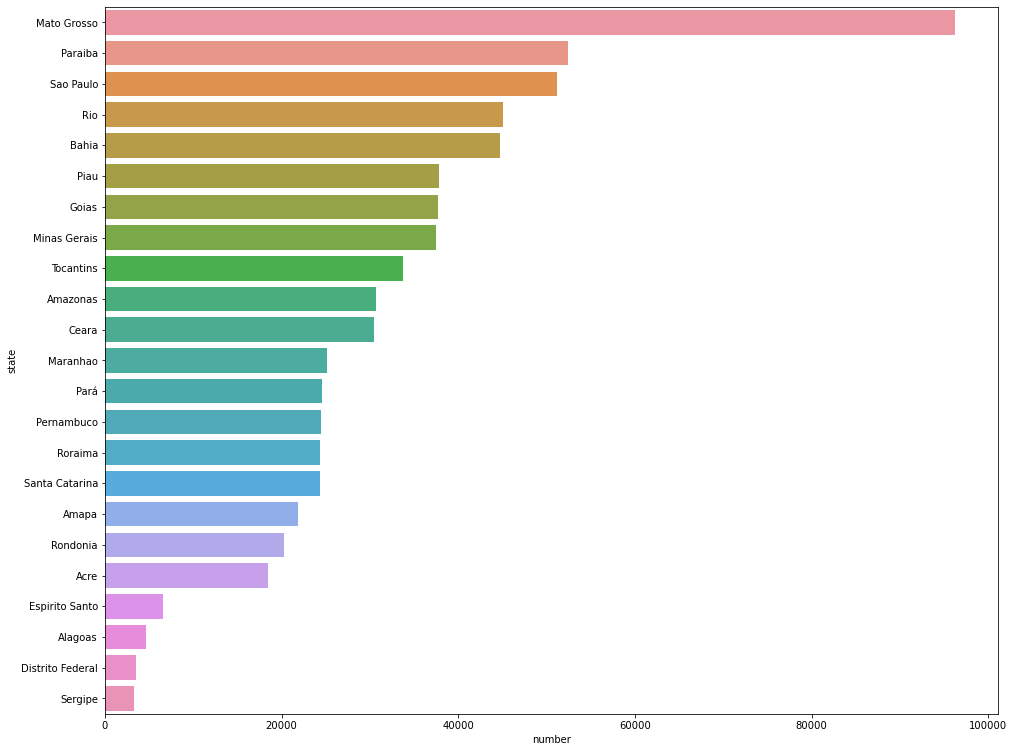

In [80]:
plt.figure(figsize=(16,13))
sns.barplot(y='state',x='number',data=top_state)

In [84]:
df[df['state'].str.contains('Amazonas',case=False)]['number'].sum()

30650.129

In [91]:
year_wise=df[df['state'].str.contains('Amazonas',case=False)].groupby('year').sum()['number'].reset_index()
year_wise

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

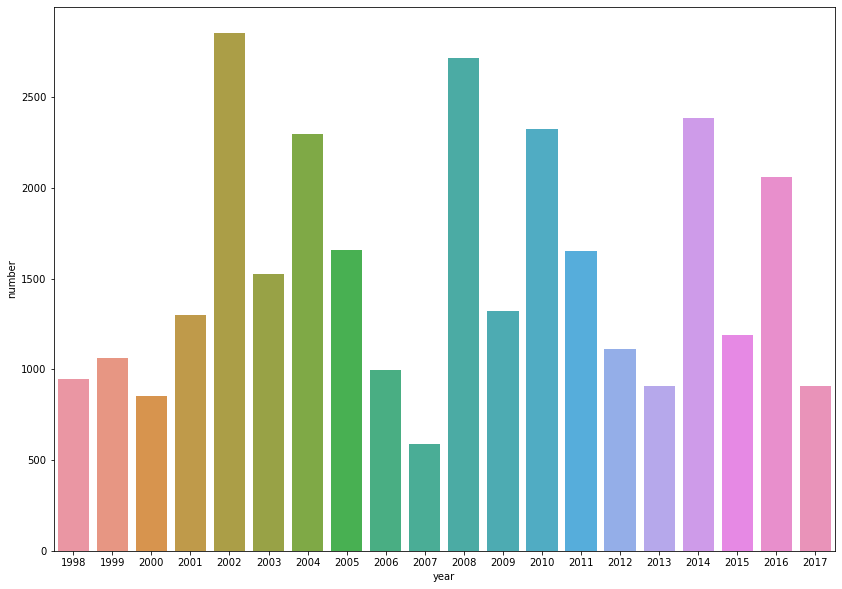

In [93]:
plt.figure(figsize=(14,10))
sns.barplot(x='year',y='number',data=year_wise)

In [94]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_english'], dtype='object')

In [111]:
day_wise=df[df['state'].str.contains('Amazonas',case=False)].groupby(df[df['state'].str.contains('Amazonas',case=False)]['date'].dt.dayofweek).sum()['number']
day_wise.index = [calendar.day_name[x] for x in range(0,7)]
day_wise=day_wise.reset_index()

<AxesSubplot:xlabel='number', ylabel='index'>

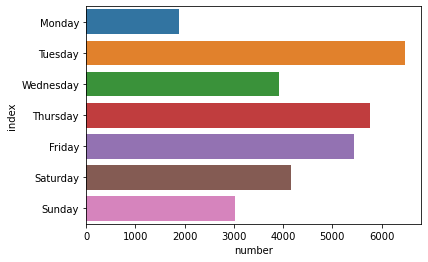

In [113]:
sns.barplot(y='index',x='number',data=day_wise)

In [118]:
print("Total number of fires reported in 2015:",df[df['year']==2015]['number'].sum())

Total number of fires reported in 2015: 41208.292


In [121]:
df['date'].value_counts()

2015-01-01    324
2010-01-01    324
2000-01-01    324
2014-01-01    324
2002-01-01    324
2003-01-01    324
2005-01-01    324
2012-01-01    324
2016-01-01    324
1999-01-01    324
2011-01-01    324
2013-01-01    323
2008-01-01    323
2009-01-01    323
2006-01-01    323
2004-01-01    323
2007-01-01    322
2001-01-01    321
1998-01-01    304
2017-01-01    296
Name: date, dtype: int64

In [124]:
month_wise_2015=df[df['year']==2015].groupby('month_english').sum()['number'].reset_index()
month_wise_2015

,month_english,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


<AxesSubplot:xlabel='number', ylabel='month_english'>

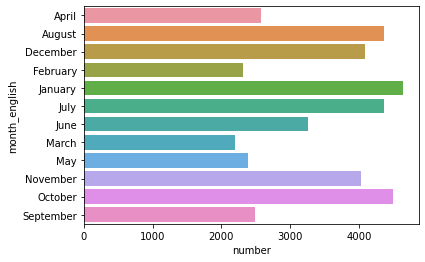

In [126]:
sns.barplot(y='month_english',x='number',data=month_wise_2015)

In [129]:
state_wise_avg=df.groupby('state').mean()['number'].sort_values(ascending=False).reset_index()
state_wise_avg

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Sao Paulo'),
  Text(1, 0, 'Mato Grosso'),
  Text(2, 0, 'Bahia'),
  Text(3, 0, 'Piau'),
  Text(4, 0, 'Goias'),
  Text(5, 0, 'Minas Gerais'),
  Text(6, 0, 'Tocantins'),
  Text(7, 0, 'Amazonas'),
  Text(8, 0, 'Ceara'),
  Text(9, 0, 'Paraiba'),
  Text(10, 0, 'Maranhao'),
  Text(11, 0, 'Pará'),
  Text(12, 0, 'Pernambuco'),
  Text(13, 0, 'Roraima'),
  Text(14, 0, 'Santa Catarina'),
  Text(15, 0, 'Amapa'),
  Text(16, 0, 'Rondonia'),
  Text(17, 0, 'Acre'),
  Text(18, 0, 'Rio'),
  Text(19, 0, 'Espirito Santo'),
  Text(20, 0, 'Alagoas'),
  Text(21, 0, 'Distrito Federal'),
  Text(22, 0, 'Sergipe')])

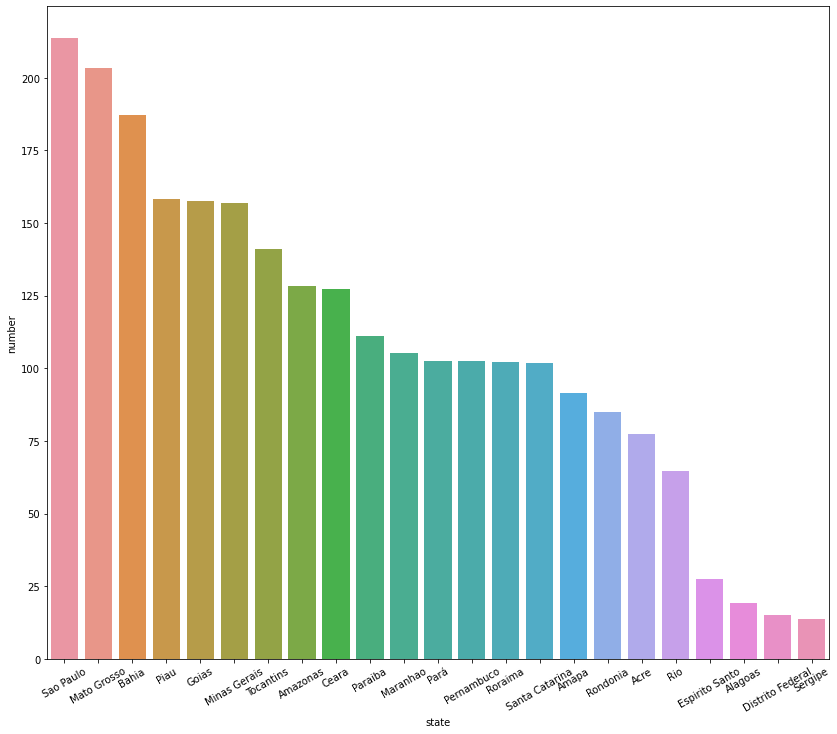

In [132]:
plt.figure(figsize=(14,12))
sns.barplot(x='state',y='number',data=state_wise_avg)
plt.xticks(rotation=30)

In [135]:
df[df['month_english']=='December']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)